## Imported Libraries

In [32]:
from __future__ import division
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as reader
from datetime import datetime

from fbprophet import Prophet

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Ticker and its information. From 1990/1/12 - now

In [33]:
ticker = ['INTC']
start = datetime(1990, 1, 12)
end = datetime.now()

df = reader.get_data_yahoo(ticker, start, end)
df = df.reset_index()
df

Attributes,Date,Adj Close,Close,High,Low,Open,Volume
Symbols,,INTC,INTC,INTC,INTC,INTC,INTC
0,1990-01-11,0.698895,1.125000,1.148438,1.117188,1.125000,41068800.0
1,1990-01-12,0.684334,1.101562,1.125000,1.093750,1.101562,48851200.0
2,1990-01-15,0.689188,1.109375,1.117188,1.085938,1.101562,33830400.0
3,1990-01-16,0.728015,1.171875,1.179688,1.093750,1.109375,103984000.0
4,1990-01-17,0.730442,1.175781,1.203125,1.171875,1.171875,115017600.0
...,...,...,...,...,...,...,...
7709,2020-08-17,48.930000,48.930000,49.310001,48.730000,49.110001,20018300.0
7710,2020-08-18,48.650002,48.650002,49.570000,48.619999,49.259998,19251400.0
7711,2020-08-19,48.330002,48.330002,48.980000,48.250000,48.790001,27775000.0


## Prophet Model

In [34]:
model = Prophet()
df[['ds','y']] = df[['Date','Adj Close']]
model.fit(df)

future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


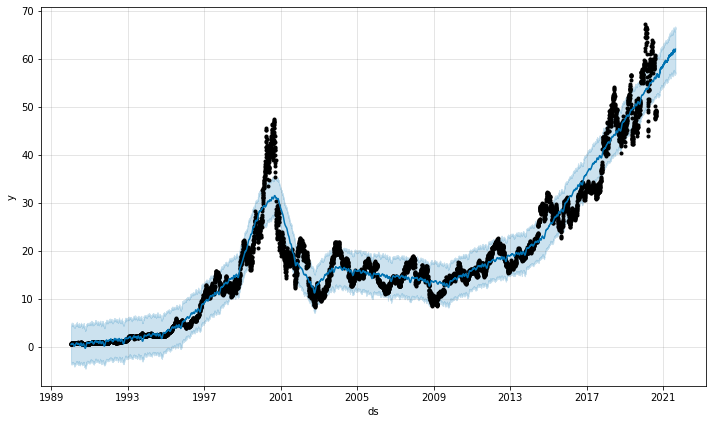

In [35]:
model.plot(forecast)
plt.show()

In [36]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
8074,2021-08-17,62.004780,57.287664,66.786080,60.355905,63.676176,-0.324057,-0.324057,-0.324057,-0.055570,-0.055570,-0.055570,-0.268488,-0.268488,-0.268488,0.0,0.0,0.0,61.680723
8075,2021-08-18,62.020115,57.262885,66.446171,60.364658,63.696205,-0.298331,-0.298331,-0.298331,-0.053436,-0.053436,-0.053436,-0.244895,-0.244895,-0.244895,0.0,0.0,0.0,61.721784
8076,2021-08-19,62.035450,56.872812,66.465212,60.357531,63.715659,-0.276127,-0.276127,-0.276127,-0.056817,-0.056817,-0.056817,-0.219310,-0.219310,-0.219310,0.0,0.0,0.0,61.759324
8077,2021-08-20,62.050785,57.055478,66.289661,60.351529,63.734777,-0.278942,-0.278942,-0.278942,-0.086648,-0.086648,-0.086648,-0.192294,-0.192294,-0.192294,0.0,0.0,0.0,61.771844
8078,2021-08-21,62.066120,57.316358,66.605771,60.374490,63.753895,-0.010682,-0.010682,-0.010682,0.153735,0.153735,0.153735,-0.164417,-0.164417,-0.164417,0.0,0.0,0.0,62.055439


## Interactive Plotly Graph

In [37]:
import plotly.graph_objects as go

trace = go.Scatter(
    name = 'Adj Close', mode = 'markers', x=list(df['ds']), y=list(df['y']), marker=dict(color='#FFBAD2', line=dict(width=1)))

trace1= go.Scatter(
    name = 'trend', mode='lines', x=list(forecast['ds']), y=list(forecast['yhat']), marker=dict(color='red', line=dict(width=3)))


In [38]:
upper_band = go.Scatter(
    name = 'upper band',
    mode = 'lines',
    x = list(forecast['ds']),
    y = list(forecast['yhat_upper']),
    line= dict(color='#57b88f'),
    fill = 'tonexty'
)

In [39]:
lower_band = go.Scatter(
    name= 'lower band',
    mode = 'lines',
    x = list(forecast['ds']),
    y = list(forecast['yhat_lower']),
    line= dict(color='#1705ff')
)

In [40]:
tracex = go.Scatter(
    name = ' Real Adj Close',
   mode = 'lines',
   x = list(df['ds']),
   y = list(df['y']),
   marker=dict(
      color='black',
      line=dict(width=2)
   )
)

In [41]:
data = [tracex, trace1, lower_band, upper_band]

layout = dict(title='INTC Price Estimation with FBProphet Time Series Analysis',
             xaxis=dict(title = 'Dates', ticklen=2, zeroline=True))

figure=dict(data=data,layout=layout)

In [42]:
py.offline.iplot(figure)